# Intro to inferential statistics: the Central Limit Theorem

Sources: 

* *"Naked statistics"*  Charles J. Wheelan

The core principle underlying the central limit theorem is that a large, properly drawn sample will resemble the population from which it is drawn.

The central limit theorem enables us to make the following inferences: 

1. If we have detailed information about some population, then we can make powerful infrences about any properly drawn sample from that population. 
2. If we have detailed information about a properly drawn sample (mean and standard deviation), we can make accurate infrences about the population from which that sample was drawn. (The central limit tell us that a large sample will not typically deviate  a lot from its underlying population).
3. If we have data describing a particular sample, and data on a particular population, we can infer whether or not that sample is consistent with a sample that is likely to be drawn from that population. The central limit theorem enable us to calculate the probability that a particular sample was drawn from a given population. If that probability is low, then we  can conclude with a high degree of confidence that the sample was not drown from the population in question.
4. If we know the underlying characteritics of two samples, we can infer whether or not both samples were likley drwn from the same population.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

### The normal distribution

It is a theoretical distribution (defined by mathematical properties).

It is a bell shaped-shaped distribution in which 68 percent of the observations lie within one standard deviation of the mean, 95 percent lie within two standard deviations, ... .

We can generate numbers "sampled from a normal distribution" with `stats.norm.rvs`.

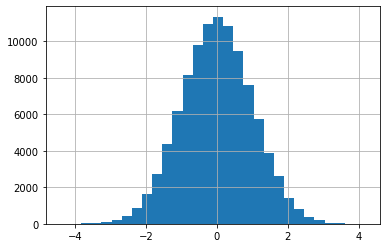

In [ ]:
# generating a normal distribution
norm_dist = stats.norm.rvs(loc=0, 
                           scale=1, 
                           size=100000,
                           random_state=123
                          )
norm_dist = pd.Series(norm_dist)
norm_dist.hist(bins=30);

In [ ]:
# find out the average of the normal distribution
mean_norm = np.mean(norm_dist)
mean_norm

0.0013148201751476637

In [ ]:
# find out the standard deviation of the normal distribution
std_norm = np.std(norm_dist)
std_norm

0.9995701769427331

In [ ]:
# find out the -1 standard deviation
sigma_negative = mean_norm - std_norm
sigma_negative

-0.9982553567675855

In [ ]:
# find out the 1 standard deviation
sigma_positive = mean_norm + std_norm
sigma_positive

1.0008849971178808

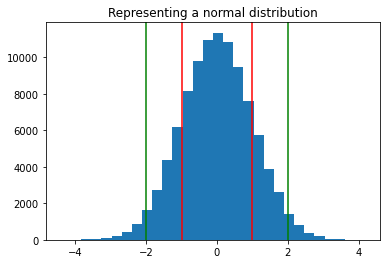

In [ ]:
# plot the normal distribution
plt.hist(norm_dist, bins=30)

# represent the -1 standard deviation
plt.axvline(sigma_negative, color = 'r')
plt.axvline(sigma_negative*2, color = 'g')

# represent the 1 standard deviation
plt.axvline(sigma_positive, color = 'r')
plt.axvline(sigma_positive*2, color = 'g')

plt.title('Representing a normal distribution')
plt.show()

What proportion of our `norm_dist` falls beyond 1 standard deviation from the mean?

In [ ]:
sigma_plus = len(
    norm_dist[
        (norm_dist > sigma_negative) &
        (norm_dist < sigma_positive)]
    )
sigma_plus

68099

In [ ]:
sigma_plus/len(norm_dist)

0.68099

OR method

In [ ]:
sigma_plus = len(
    norm_dist[
        (norm_dist < sigma_negative) |
        (norm_dist > sigma_positive)]
    )
sigma_plus

31901

In [ ]:
new= sigma_plus/len(norm_dist)

In [ ]:
1 - new

0.68099

**Exercise 1:** 

What proportion of our `norm_dist` falls beyond two standard deviations of the mean? And beyond three?

In [ ]:
# your code here
beyond_two = len(norm_dist[(norm_dist>sigma_negative*2)&(norm_dist<sigma_positive*2)])
beyond_two
beyond_two_percent = (100000-beyond_two)/100000*100
beyond_two_percent

4.455

#OR method

In [ ]:
sigma_plus_beyond = len(
    norm_dist[
        (norm_dist < sigma_negative*2) |
        (norm_dist > sigma_positive*2)]
    )

sigma_plus_beyond = round(sigma_plus_beyond/len(norm_dist) * 100, 2)
sigma_plus_beyond

4.46

In [ ]:
sigma_plus_beyond = len(
    norm_dist[
        (norm_dist < sigma_negative*3) |
        (norm_dist > sigma_positive*3)]
    )

sigma_plus_beyond = round(sigma_plus_beyond/len(norm_dist) * 100,2)
sigma_plus_beyond


0.27

In [ ]:
sigma_plus_beyond = len(                        #thomas
    norm_dist[
       
        (norm_dist >= sigma_positive*2)]
    )
sigma_plus_beyond 

2246

What's the probability of exactly 0 in this function?

In [ ]:
len(
    norm_dist[norm_dist==0]
    )

0

None of the sampled values is _exactly_ zero. Since we're dealing with a theoretical distribution, we can estimate the probability of an exact value with the Probability Density Function:

In [ ]:
stats.norm.pdf(0)

0.3989422804014327

We can also compute the cumulative distribution function: what proportion of the area falls below a certain number?

In [ ]:
np.round(
    # cumulative function
    stats.norm.cdf(-2)*2
    , 2
    )

0.05

## Explore a population

Let's move from theoretical distributions to real populations. We generally do not have access to a whole population: we only have access to samples. We use these samples to make guesses about the population. In this exercise we _do_ have access to the population so that we can prove how to make those guesses, and how accurate they can be.

Here's the distribution of our population:

In [ ]:
# population.csv
url = 'https://drive.google.com/file/d/1jomahr4JUPi8lAO33_RB1I-1089feWg2/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
pop = pd.read_csv(path)

pop.head()

,0
0,1.160131
1,0.222175
2,3.101406
3,0.758150
4,2.159439


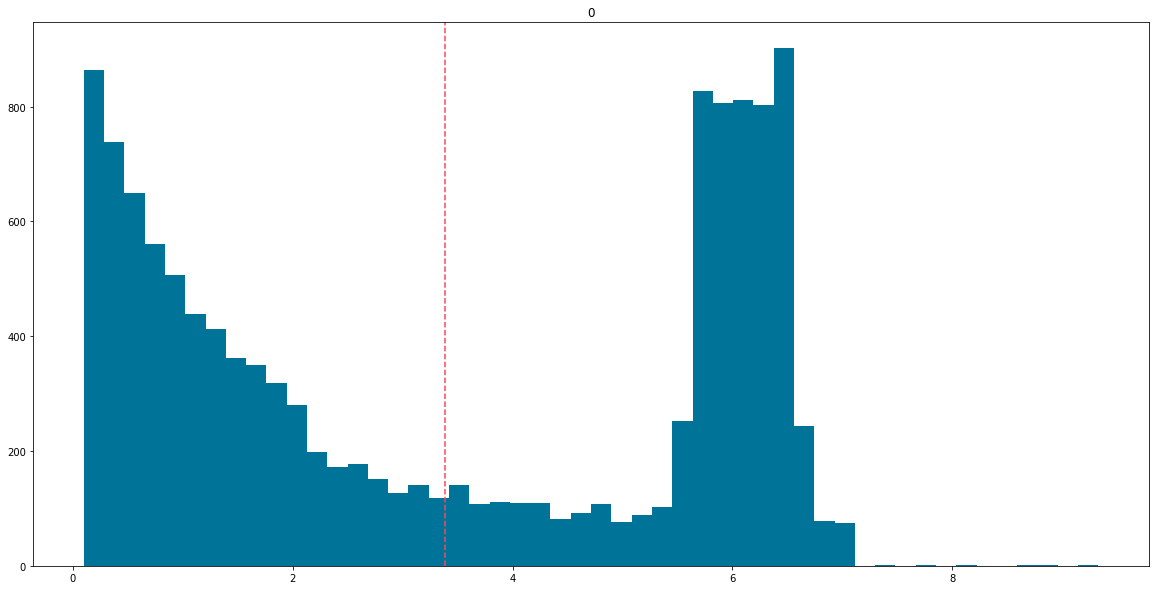

In [ ]:
pop.hist(bins=50, grid=False, color="#007398", figsize=(20,10));
plt.axvline(float(pop.mean()), linestyle="--", color="#f8485e");

In [ ]:
# Population mean:
pop_mean = np.mean(pop)
pop_mean

0    3.387146
dtype: float64

In [ ]:
# Population mean:# different syntax
pop_mean = pop.mean()
pop_mean

0    3.387146
dtype: float64

In [ ]:
# Population standard deviation:
pop_std = np.std(pop)
pop_std

0    2.438371
dtype: float64

In [ ]:
# number of observations in our population
len(pop)

12500

Let's take a sample from our population:

In [ ]:
sample = pop.sample(n=50, # size
                    random_state=4321)
# sample

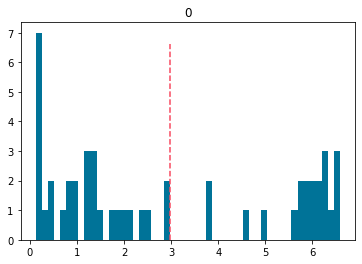

In [ ]:
sample = pop.sample(n=50)

sample.hist(bins=50, grid=False, color="#007398");
plt.axvline(float(sample.mean()), linestyle="--", ymax=0.9, color="#f8485e");

The mean of the sample is similar but not equal to the mean of the population. By the way, the mean of the sample is called... well, **sample mean**.

In [ ]:
# Sample mean
print('sample mean:', float(np.mean(sample)))
print('pop mean:', float(pop_mean))

sample mean: 2.9835796202906333
pop mean: 3.3871463523736334


According to the central limit theorem, the sample means for any population will be distributed roughly as a normal distribution around the population mean:

1. Any sample extracted from a population will have a mean. 
2. If we take repeated samples from that population, each sample taken will have their own mean. These are the sample means. 
3. Most of the sample means will be close to the population mean. 
4. The central limit theorem tells us that the sample means will be distributed (almost) as a normal distribution around the population mean. 
5. All of this will be true no matter what the distribution of the underlying population looks like*. The population from which the samples are being drawn does not have to have a normal distribution in order for the sample means to be distributed normally.


*If the population has extreme outliers and the samples are very small, the CLT may not be met.

We may have a population with a higly skewed population, but the distribution of the sample means will not be skewed.

The larger the number of the samples, the more closely the distribution will approximate the normal distribution.

## Sampling distributions

Now we take 100, 1000 or 10000 samples, each one of size 50

In [ ]:
number_of_samples = 10000
sample_size = 50
samples = []

for number in range(number_of_samples): 
    simple_random_sample = pop.sample(n= sample_size, 
                                      replace=True
                                     )
    samples.append([simple_random_sample])

We capture the mean of each sample:

In [ ]:
sample_means = []

for s in samples:
    sample_means.append(np.mean(s))


The result is the **sampling distribution** of the **sample means**:

In [ ]:
# we had a population of 12.500 elements
# this population had a weird bimodal dist
# we took 10.000 samples (each sample had size = 50)
# we looked at the mean of each one of the 10.000 samples
# we have 10.000 sample means
# this is called a sampling distribution
# it approximates heavily a normal distribution

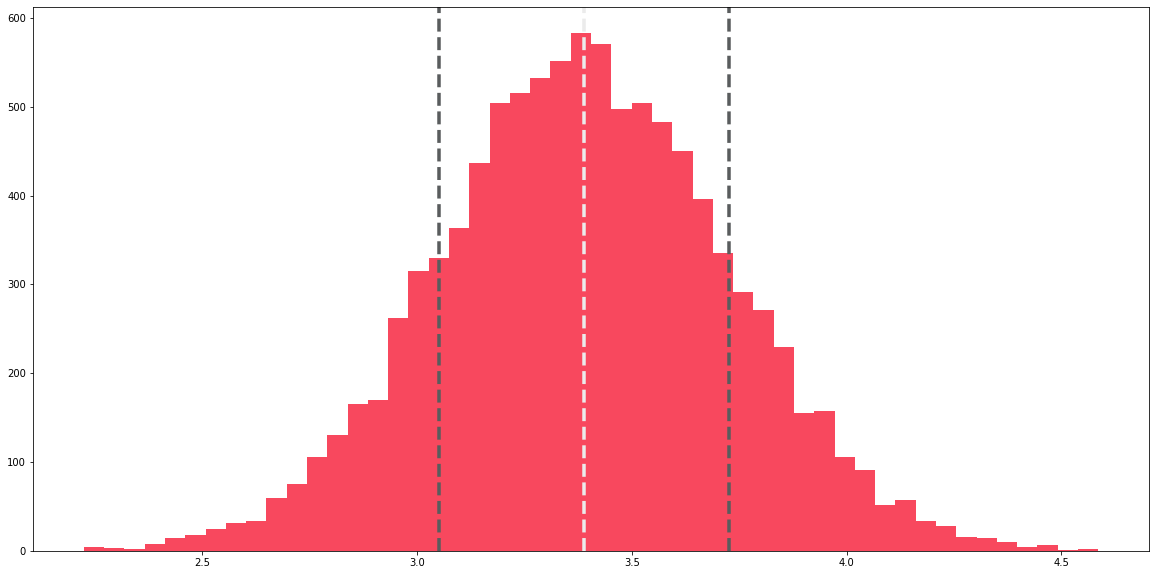

In [ ]:
sampling_dist_sample_means=pd.Series(sample_means)
sdsm_mean = float(sampling_dist_sample_means.mean())
se = float(sampling_dist_sample_means.std())
                  
sampling_dist_sample_means.hist(bins=50, grid=False, figsize=(20,10), color="#f8485e");
plt.axvline(sdsm_mean, linestyle="--",linewidth=3.5, color="#EBEBEB");
plt.axvline(sdsm_mean+se, linestyle="--",linewidth=3.5, color="#595C5D");
plt.axvline(sdsm_mean-se, linestyle="--",linewidth=3.5, color="#595C5D");

The larger the sample size and the more samples taken, the more closely the distribution of sample means will approximate the normal curve. (As a rule of thumb, the sample size must at least 30 for the central limit theorem to hold true). Note: a larger sample is less likely to be affected by a random variation.

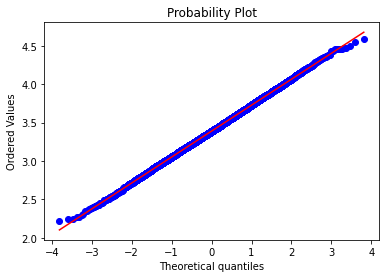

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(sampling_dist_sample_means,
               dist="norm",
               plot=plt);

The power of a normal distribution derives from the fact that we know roughly what proportion of observations will lie within one standard deviation above or below the mean (68 percent); what proportion of observations will lie within two standard deviations above or below the mean (95 percent); and so on. 

The mean of the sampling distribution of the sample means should be pretty close to the true mean of the population:

In [ ]:
pop_mean

0    3.387146
dtype: float64

In [ ]:
mean_sdsm = np.mean(sampling_dist_sample_means)
mean_sdsm

3.388650380307358

In [ ]:
print(pop_mean - mean_sdsm)

0   -0.001504
dtype: float64


We know that in a normal distribution, 95% of the values fall within 2 standard deviations of the mean. We will check that. But first, a terminology alert:

> The *standard deviation of the sampling distribution of the sample means* is called **standard error of the mean** or simply **standard error**.



Which is the difference between the standard error and the standard deviation?

* The standard deviation measures the dispersion in the underlying population.
* The standard error measures the dispersion of the sampling distribution of sample means.

In [ ]:
# Standard error:
se = np.std(sampling_dist_sample_means)
se

0.33735909928389796

In [ ]:
# The lower and upper bound of the interval that should contain
# ~95% of the sample means
lower_bound = mean_sdsm - 2*se
upper_bound = mean_sdsm + 2*se

print(round(lower_bound, 2), "-", round(upper_bound, 2))

2.71 - 4.06


In [ ]:
# How many of the sample means fall within this interval?
count = 0
for i in sample_means:
    if i > lower_bound and i < upper_bound:
        count +=1
print(f"Percentage of sample means within 2 standard errors of the mean = { count/len(sample_means)*100 }")

Percentage of sample means within 2 standard errors of the mean = 95.42


Another cool property the *standard error* is that it can be estimated by taking the standard deviation of the population and dividing it by the square root of the sample size.

Let's see how this checks out with our data:

In [ ]:
sample_size

50

In [ ]:
# standard error
se

0.33735909928389796

In [ ]:
# standard deviation of the population
pop_std

0    2.438371
dtype: float64

The formula of standard error is: 

$$\sigma_{M} = \frac{\sigma}{\sqrt(n)}$$

* $\sigma$ is the standard deviation of the population from which sample is drawn.
* $n$ is the size of the sample.

The standard error(SE) is very similar to standard deviation. Both are measures of spread. The higher the number, the more spread out your data is. To put it simply, the two terms are essentially equal—but there is one important difference. While the standard error uses statistics (sample data) standard deviations use parameters (population data). (What is the difference between a statistic and a parameter?).

In statistics, you’ll come across terms like “the standard error of the mean” or “the standard error of the median.” The SE tells you how far your sample statistic (like the sample mean) deviates from the actual population mean. The larger your sample size, the smaller the SE. In other words, the larger your sample size, the closer your sample mean is to the actual population mean.

The standard error will be large when the standard deviation of the underlying distribution is large. 

A large sample drawn from a highly dispersed population is also likely to be highly dispersed; a large sample from a population clustered tightly around the mean is also likely to be clustered tightly aroud the mean. This is why the standard deviation is in the numerator. 

Similarly, we would expect the standard error to get smaller as the sample size gets larger, since large sample size (n) is in the denominator.

In [ ]:
# population standard deviation / square root of population size
pop_std/np.sqrt(sample_size)

0    0.344838
dtype: float64

When we don't have access the population, we estimate the standard error of the mean by taking the standard deviation of the sample:

In [ ]:
sample.std()/np.sqrt(sample_size)

0    0.343089
dtype: float64

In the major part of the cases, we don't know the population standard deviation, so for large samples, we can assume that the standard deviation of the sample is reasonably close to the standard deviation of the population.



**Exercise 3:** Before moving on, repeat the experiment changing a few parameters and note down what happens in the following cases:

* With diferent sample sizes (both smaller and greater)
* With fewer or more samples.
* Adding some extreme outliers to the population.
* Sampling without replacement.

In [ ]:
# you can copy-paste code from above in this cell
# and modify it

Summarising the main ideas: 

1. If you draw large, random samples from any population, the means of those samples will be distributed normally around the population mean (regardless of what the distribution of the underlying population looks like).
2. Most sample means will lie reasonably close to the poulation mean; the standard error is what defines "reasonably close".
3. The central limit theorem tells us the probability that a sample mean will lie within a certain distance of the population mean. It is relatively unlikely that a sample mean willl lie more than two standard errors from the population mean, and extremely unlikely that it will lie three or more standard errors from the population mean. 
4. The less likely it is that an outcome has been observed by change, the more confidence we can in surmising that some other factor is in play. 

## Squirrels example

Let's assume that the 'pop' values represent the weights of squirrels. Now, we don't know the values of the population —this is what happens in reality, the population is not known. We simply go to the forest, take a random sample of 50 squirrels and register their weight:

In [ ]:
squirrels = pop.sample(50, random_state=1990)

In [ ]:
#squirrels

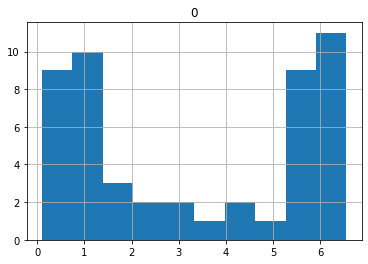

In [ ]:
# this is the distribution of the sample
squirrels.hist();

We wonder if the mean of the weights of the squirrels is close to the 'true' mean of the population (which we can't measure)


In [ ]:
# mean of our sample
mean_squirrels = float(squirrels.mean())
mean_squirrels

3.3492958902381855

The standard error of the mean is an estimate of how far the sample mean is likely to be from the population mean.

It is an estimate of the standard deviation of the sampling distribution of the sample means, which, as we've seen, follows a normal ditribution.

In [ ]:
# standard error of the mean

# AKA standard deviation
# of the sampling distribution
# of sample means

# we estimate it using:
# - the std of our sample
# - the square root of the sample size

sem_squirrels = float(squirrels.std()/np.sqrt(len(squirrels)))
sem_squirrels

0.34511169176753176

In [ ]:
# using scipy you can also calculate the standard error of the mean
stats.sem(squirrels)

array([0.34511169])

We know that no matter the distribution of our sample or the population, the sampling distribution of the sample means is normal (Central Limit Theorem).

Knowing that, we can use the properties of the normal distribution to gain information about our sample and how much it might differ from the true population.

We have:

1. The mean of the sample.
2. An estimation of the standard error.

With this two elements and knowing the CLT, we can simulate a sampling distribution of sample means built around the mean of our sample.

This sampling distribution we will simulate will be, of course, normal. We can plot it and draw the lines within 2 Standard Errors above and below the mean, representing the interval where 95% of the observations fall:

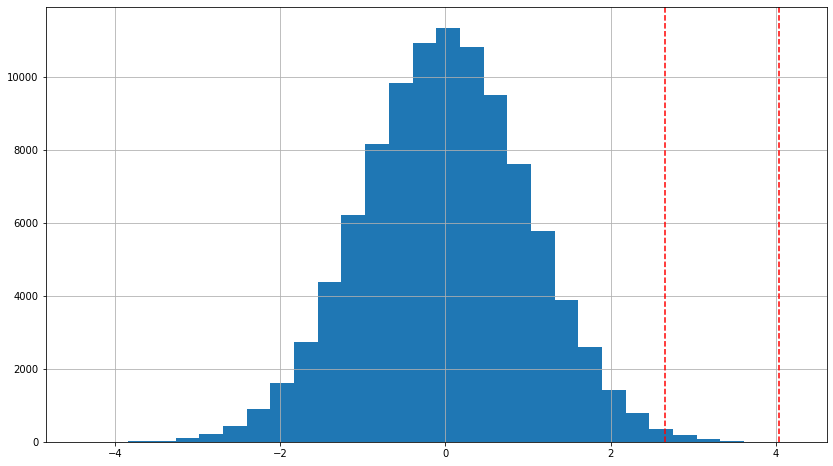

In [ ]:
# generating a normal distribution
sampling_dist_squirrels = stats.norm.rvs(loc=mean_squirrels, # The mean of the sample.
                                         scale=sem_squirrels, # An estimation of the standard error.
                                         size=100000,
                                         random_state=123
                                         )
norm_dist = pd.Series(norm_dist)
norm_dist.hist(bins=30, figsize=(14, 8))
plt.axvline(mean_squirrels-sem_squirrels*2, color = 'r', linestyle="--")
plt.axvline(mean_squirrels+sem_squirrels*2, color = 'r', linestyle="--");

What does this distribution and this interval tell us?

If we took many samples, and in each sample we drew this interval with the red dotted lines, 95% of the time the true mean would fall inside of the interval. 5% of the time, the mean would fall outside (2.5% in each direction).

This is why we call this the 95% confidence interval. A **confidence interval** is a 'plausible range of values' for a population parameter (in this case, the mean).

Let's calculate the upper and lower bounds of this interval:

In [ ]:
# upper bound of the confidence interval
np.mean(squirrels) + stats.sem(squirrels)*2

0    4.039519
dtype: float64

In [ ]:
# lower bound of the confidence interval
np.mean(squirrels) - stats.sem(squirrels)*2

0    2.659073
dtype: float64

In [ ]:
# using scipy to calculate the confidence interval:
stats.norm.interval(alpha=0.95, # the confidence level
                 loc=np.mean(squirrels), # mean of our sample
                 scale=stats.sem(squirrels)) # standard error of the mean

# if you want the results to match with the manual calculation above,
# change the "2" for a "1.96"

(array([2.6728894]), array([4.02570238]))

We have made some estimations that might be imperfect, for example when calculating the Standard Error. And our sample is not really big (only 50 squirrels). If we want an extra degree of confidence or, in other words, a more conservative estimate of the confidence intermal, we can use a t-distribution instead of a normal distribution.

A t distribution is 'flatter' and has 'fat tails' for small populations, and is indistinguishable from a normal distribution for bigger populations.



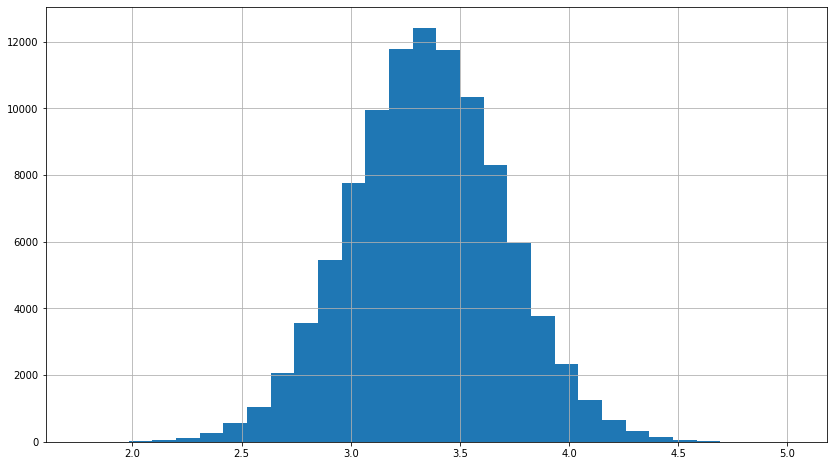

In [ ]:
# generating a t distribution
sampling_t_dist_squirrels = stats.t.rvs(loc=mean_squirrels, # The mean of the sample.
                                        scale=sem_squirrels, # An estimation of the standard error.
                                        df=len(squirrels), # Our sample size
                                        size=100000,
                                        random_state=123
                                         )
sampling_t_dist_squirrels = pd.Series(sampling_t_dist_squirrels)
sampling_t_dist_squirrels.hist(bins=30, figsize=(14, 8));

The confidence interval is slightly thinner if we use a normal distribution:

In [ ]:
# using a t distribution:
stats.t.interval(0.95, # the confidence level
                 len(squirrels)-1, # degrees of freedom = sample size - 1
                 loc=np.mean(squirrels), # mean of our sample
                 scale=stats.sem(squirrels)) # standard error of the mean

(array([2.65576798]), array([4.0428238]))

Did the true mean really fall within the 95% confidence interval?

In [ ]:
# code here


Probably yes, but beware: by definition, 5% of the time it will not!

**Final Challenge**: Can you run the experiment 10,000 times and prove it?

In [ ]:
# code here